# Building trees with n96 samples

In [2]:
## Add paths
.libPaths("/nfs/scistore18/bartogrp/apal/R/x86_64-pc-linux-gnu-library/4.3")

## Load packages
library("ape")
library("phangorn")
library("tictoc")
library("parallel")
library("data.table")

## Set wrodking directory
setwd("~/snap_hap")


Attaching package: ‘data.table’


The following object is masked from ‘package:tictoc’:

    shift




In [23]:
## No. of parallel cores
detectCores()

[1] 24

In [3]:
## Read PHYLIP file
tic()
n96 <- read.phyDat("~/snap_hap/variants/vcf_bcftools_n96/n96_biSNPs.filtered.min4.phy", format = "phylip", type = "dna")
toc()
str(n96)

84.235 sec elapsed
List of 96
 $ n96_Morotium_Des_P168-1_v3.5     : int [1:1516234] 16 16 16 16 16 16 16 16 16 16 ...
 $ n96_Am_Ave_x3318_v3.5            : int [1:1516234] 16 16 16 16 1 4 2 16 16 16 ...
 $ n96_Am_Ave_x3327_v3.5            : int [1:1516234] 16 4 2 6 16 16 16 8 2 2 ...
 $ n96_Am_Ave_x3333_v3.5            : int [1:1516234] 4 8 2 1 1 4 2 4 2 2 ...
 $ n96_Am_Ave_x3394_v3.5            : int [1:1516234] 4 4 2 16 16 16 16 16 16 2 ...
 $ n96_Am_Ave_x4101_v3.5            : int [1:1516234] 4 4 10 1 1 4 2 16 2 2 ...
 $ n96_Am_Ave_x4102_v3.5            : int [1:1516234] 4 4 2 1 1 4 2 16 2 16 ...
 $ n96_Am_Ave_x4116_v3.5            : int [1:1516234] 16 16 16 16 16 16 16 16 2 2 ...
 $ n96_Am_Ave_x4128_v3.5            : int [1:1516234] 4 8 10 1 7 10 6 4 2 2 ...
 $ n96_Am_Ave_x4129_v3.5            : int [1:1516234] 8 4 10 16 16 16 16 4 16 2 ...
 $ n96_Am_Ave_x4134_v3.5            : int [1:1516234] 4 4 10 1 1 4 2 4 16 2 ...
 $ n96_Am_Ave_x4137_v3.5            : int [1:1516234] 16 16 2 1

In [27]:
## Read sample info
samples <- fread("~/snap_hap/samples-n96.txt", header = F)
colnames(samples) <- c("ID", "population", "phenotype", "colour","geography")

<hr>

## Neighbour-Joining Tree

30.907 sec elapsed


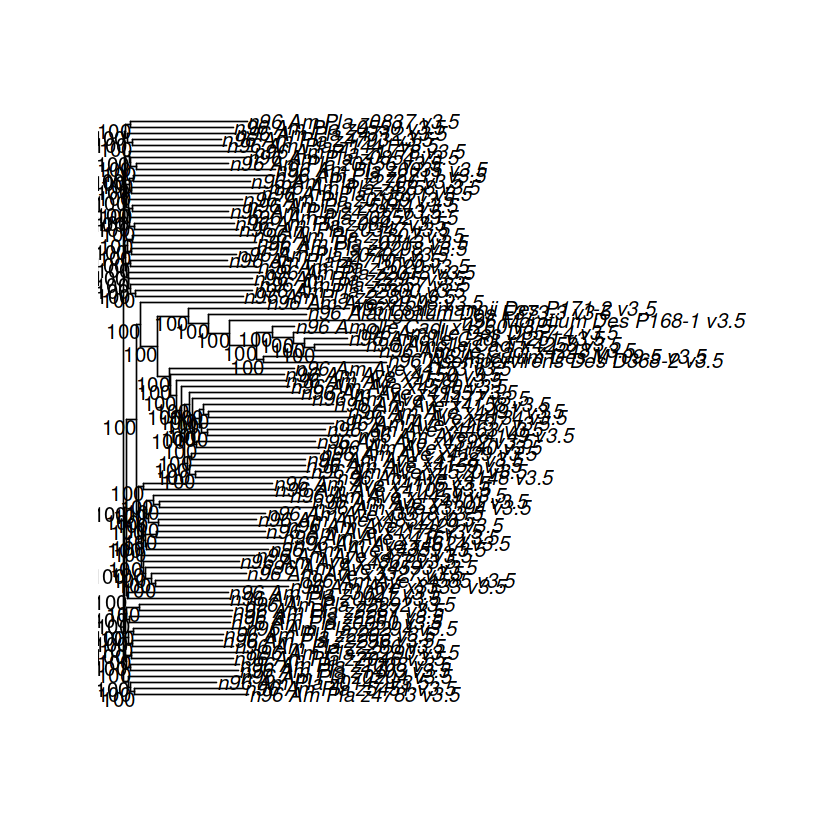

In [4]:
## Construct distance matrix
dm_n96 <- dist.ml(n96, model = "JC69")

## Neighbour-Joining tree with bootstrapping
tic()
treeNJ_n96 <- NJ(dm_n96)
bootstrapNJ_n96 <- bootstrap.phyDat(n96, 
                                 FUN = function(x){NJ(dm_n96)}, 
                                 bs = 100)
toc()
treeNJ_n96 <- plotBS(treeNJ_n96, bootstrapNJ_n96, "phylogram")

In [5]:
str(treeNJ_n96)

List of 5
 $ edge       : int [1:189, 1:2] 131 131 137 137 113 113 106 106 142 142 ...
 $ edge.length: num [1:189] 0.004217 0.004774 0.003851 0.003647 0.000218 ...
 $ tip.label  : chr [1:96] "n96_Morotium_Des_P168-1_v3.5" "n96_Am_Ave_x3318_v3.5" "n96_Am_Ave_x3327_v3.5" "n96_Am_Ave_x3333_v3.5" ...
 $ Nnode      : int 94
 $ node.label : num [1:94] 100 100 100 100 100 100 100 100 100 100 ...
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "postorder"


In [11]:
write.tree(treeNJ_n96, "treeNJ_n96.tree")

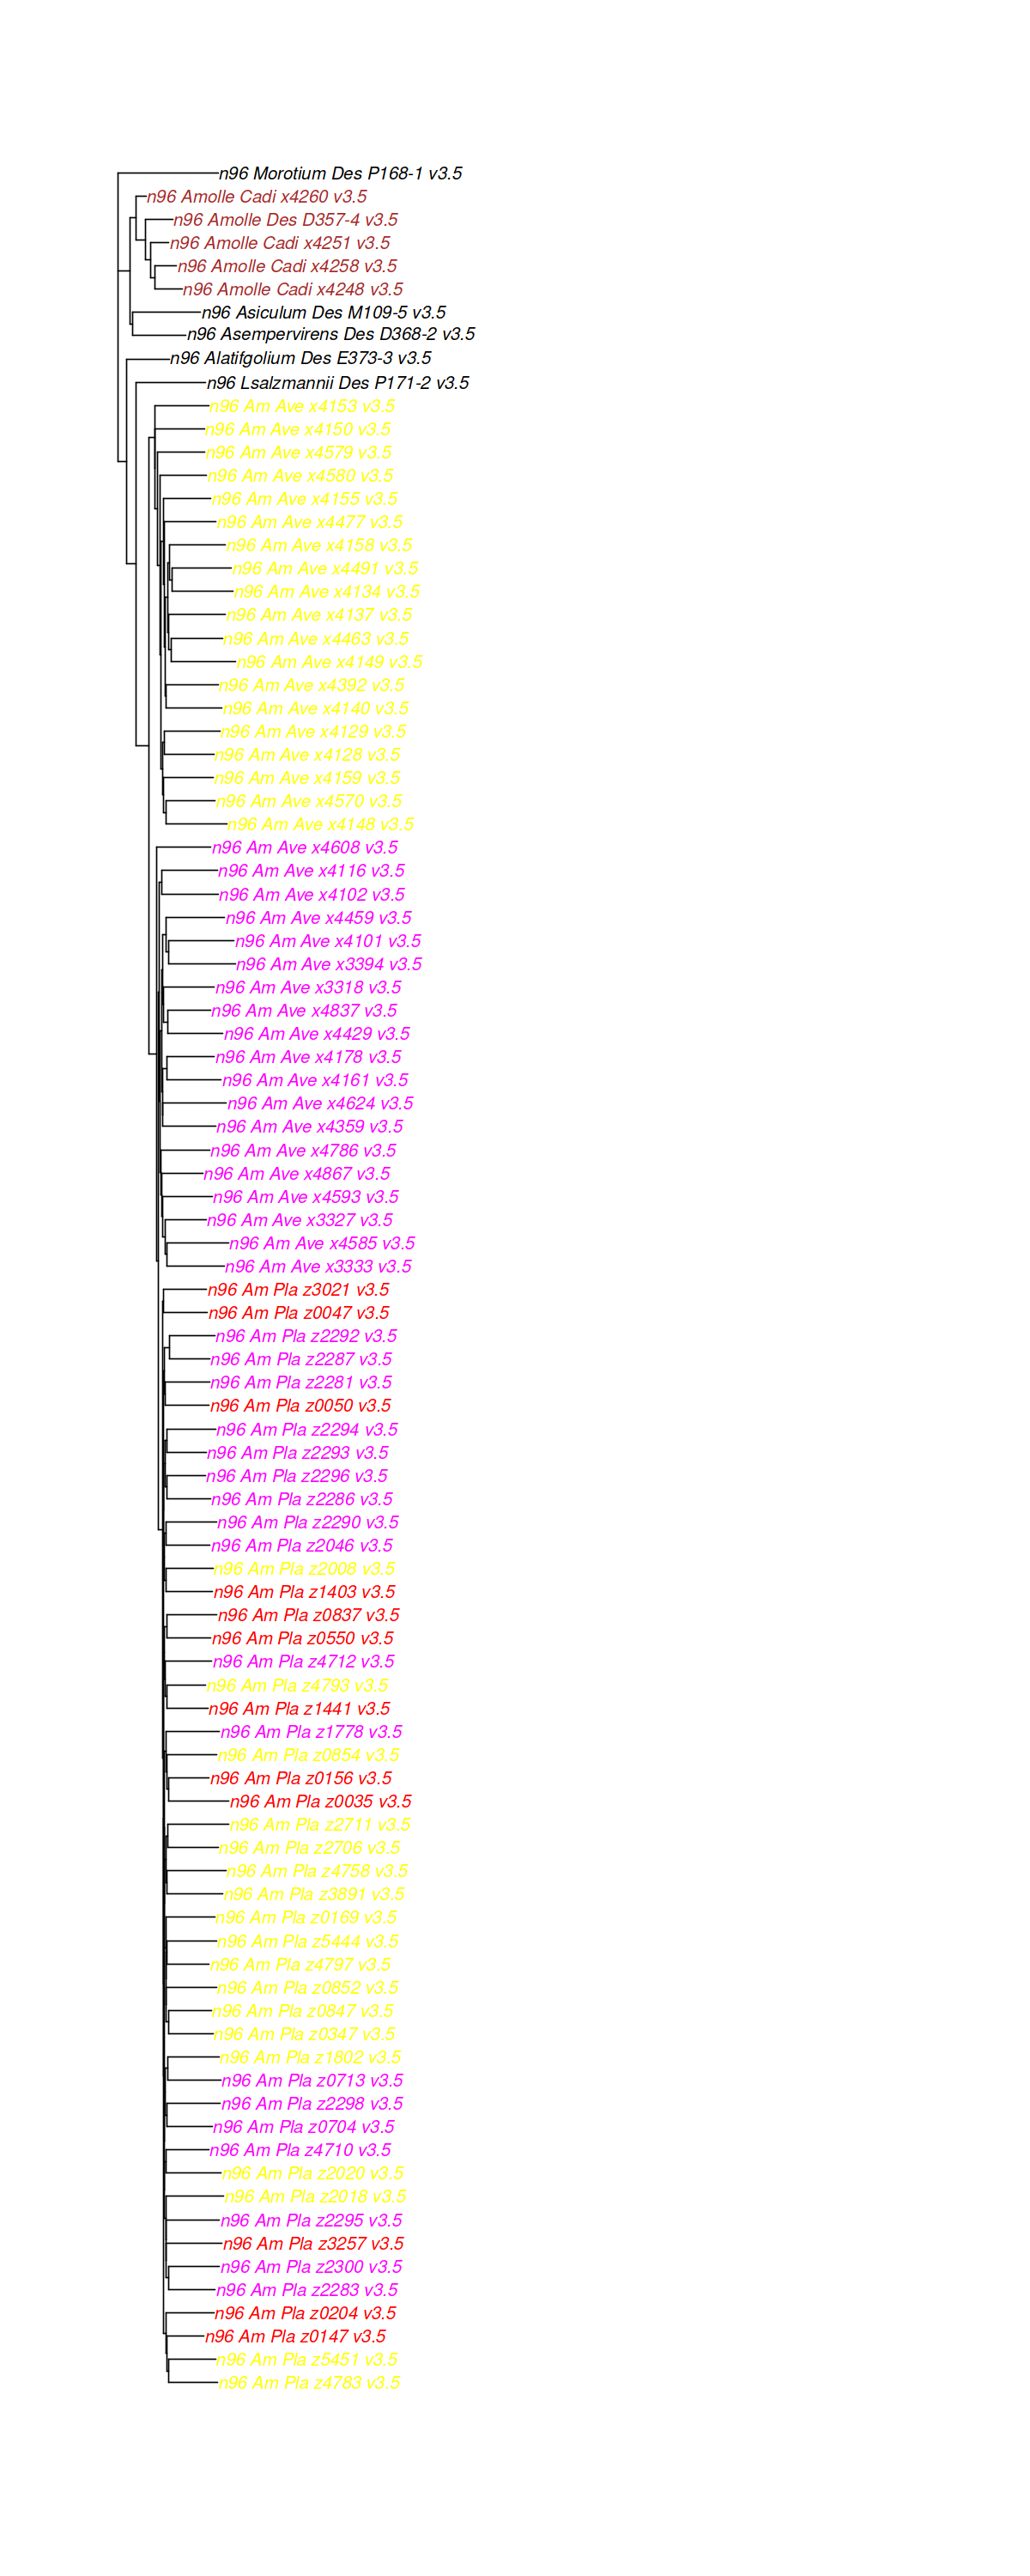

In [25]:
options(repr.plot.width=10, repr.plot.height=25)
treeNJ_n96.tip.colour <- samples[match(treeNJ_n96$tip.label, samples$ID),]$colour
plot(root(treeNJ_n96, 
          c("n96_Morotium_Des_P168-1_v3.5")), 
     tip.color = treeNJ_n96.tip.colour, 
     cex = 1)

## neighbourNet 

In [12]:
tic()
nNet_n96 <- neighborNet(dm_n96)
toc()

264.604 sec elapsed


In [13]:
str(nNet_n96)

List of 6
 $ edge       : int [1:2636, 1:2] 97 97 97 97 97 98 98 98 99 99 ...
 $ tip.label  : chr [1:96] "n96_Am_Pla_z0047_v3.5" "n96_Am_Pla_z3021_v3.5" "n96_Am_Ave_x4608_v3.5" "n96_Am_Ave_x4867_v3.5" ...
 $ Nnode      : int 1373
 $ splitIndex : int [1:2636] 300 297 298 295 296 298 299 296 295 296 ...
 $ edge.length: num [1:2636] 3.90e-04 4.42e-05 8.39e-06 1.85e-05 1.45e-05 ...
 $ splits     :List of 300
  ..$ : int 1
  ..$ : int 2
  ..$ : int 3
  ..$ : int 4
  ..$ : int 5
  ..$ : int 6
  ..$ : int 7
  ..$ : int 8
  ..$ : int 9
  ..$ : int 10
  ..$ : int 11
  ..$ : int 12
  ..$ : int 13
  ..$ : int 14
  ..$ : int 15
  ..$ : int 16
  ..$ : int 17
  ..$ : int 18
  ..$ : int 19
  ..$ : int 20
  ..$ : int 21
  ..$ : int 22
  ..$ : int 23
  ..$ : int 24
  ..$ : int 25
  ..$ : int 26
  ..$ : int 27
  ..$ : int 28
  ..$ : int 29
  ..$ : int 30
  ..$ : int 31
  ..$ : int 32
  ..$ : int 33
  ..$ : int 34
  ..$ : int 35
  ..$ : int 36
  ..$ : int 37
  ..$ : int 38
  ..$ : int 39
  ..$ : int 40
 

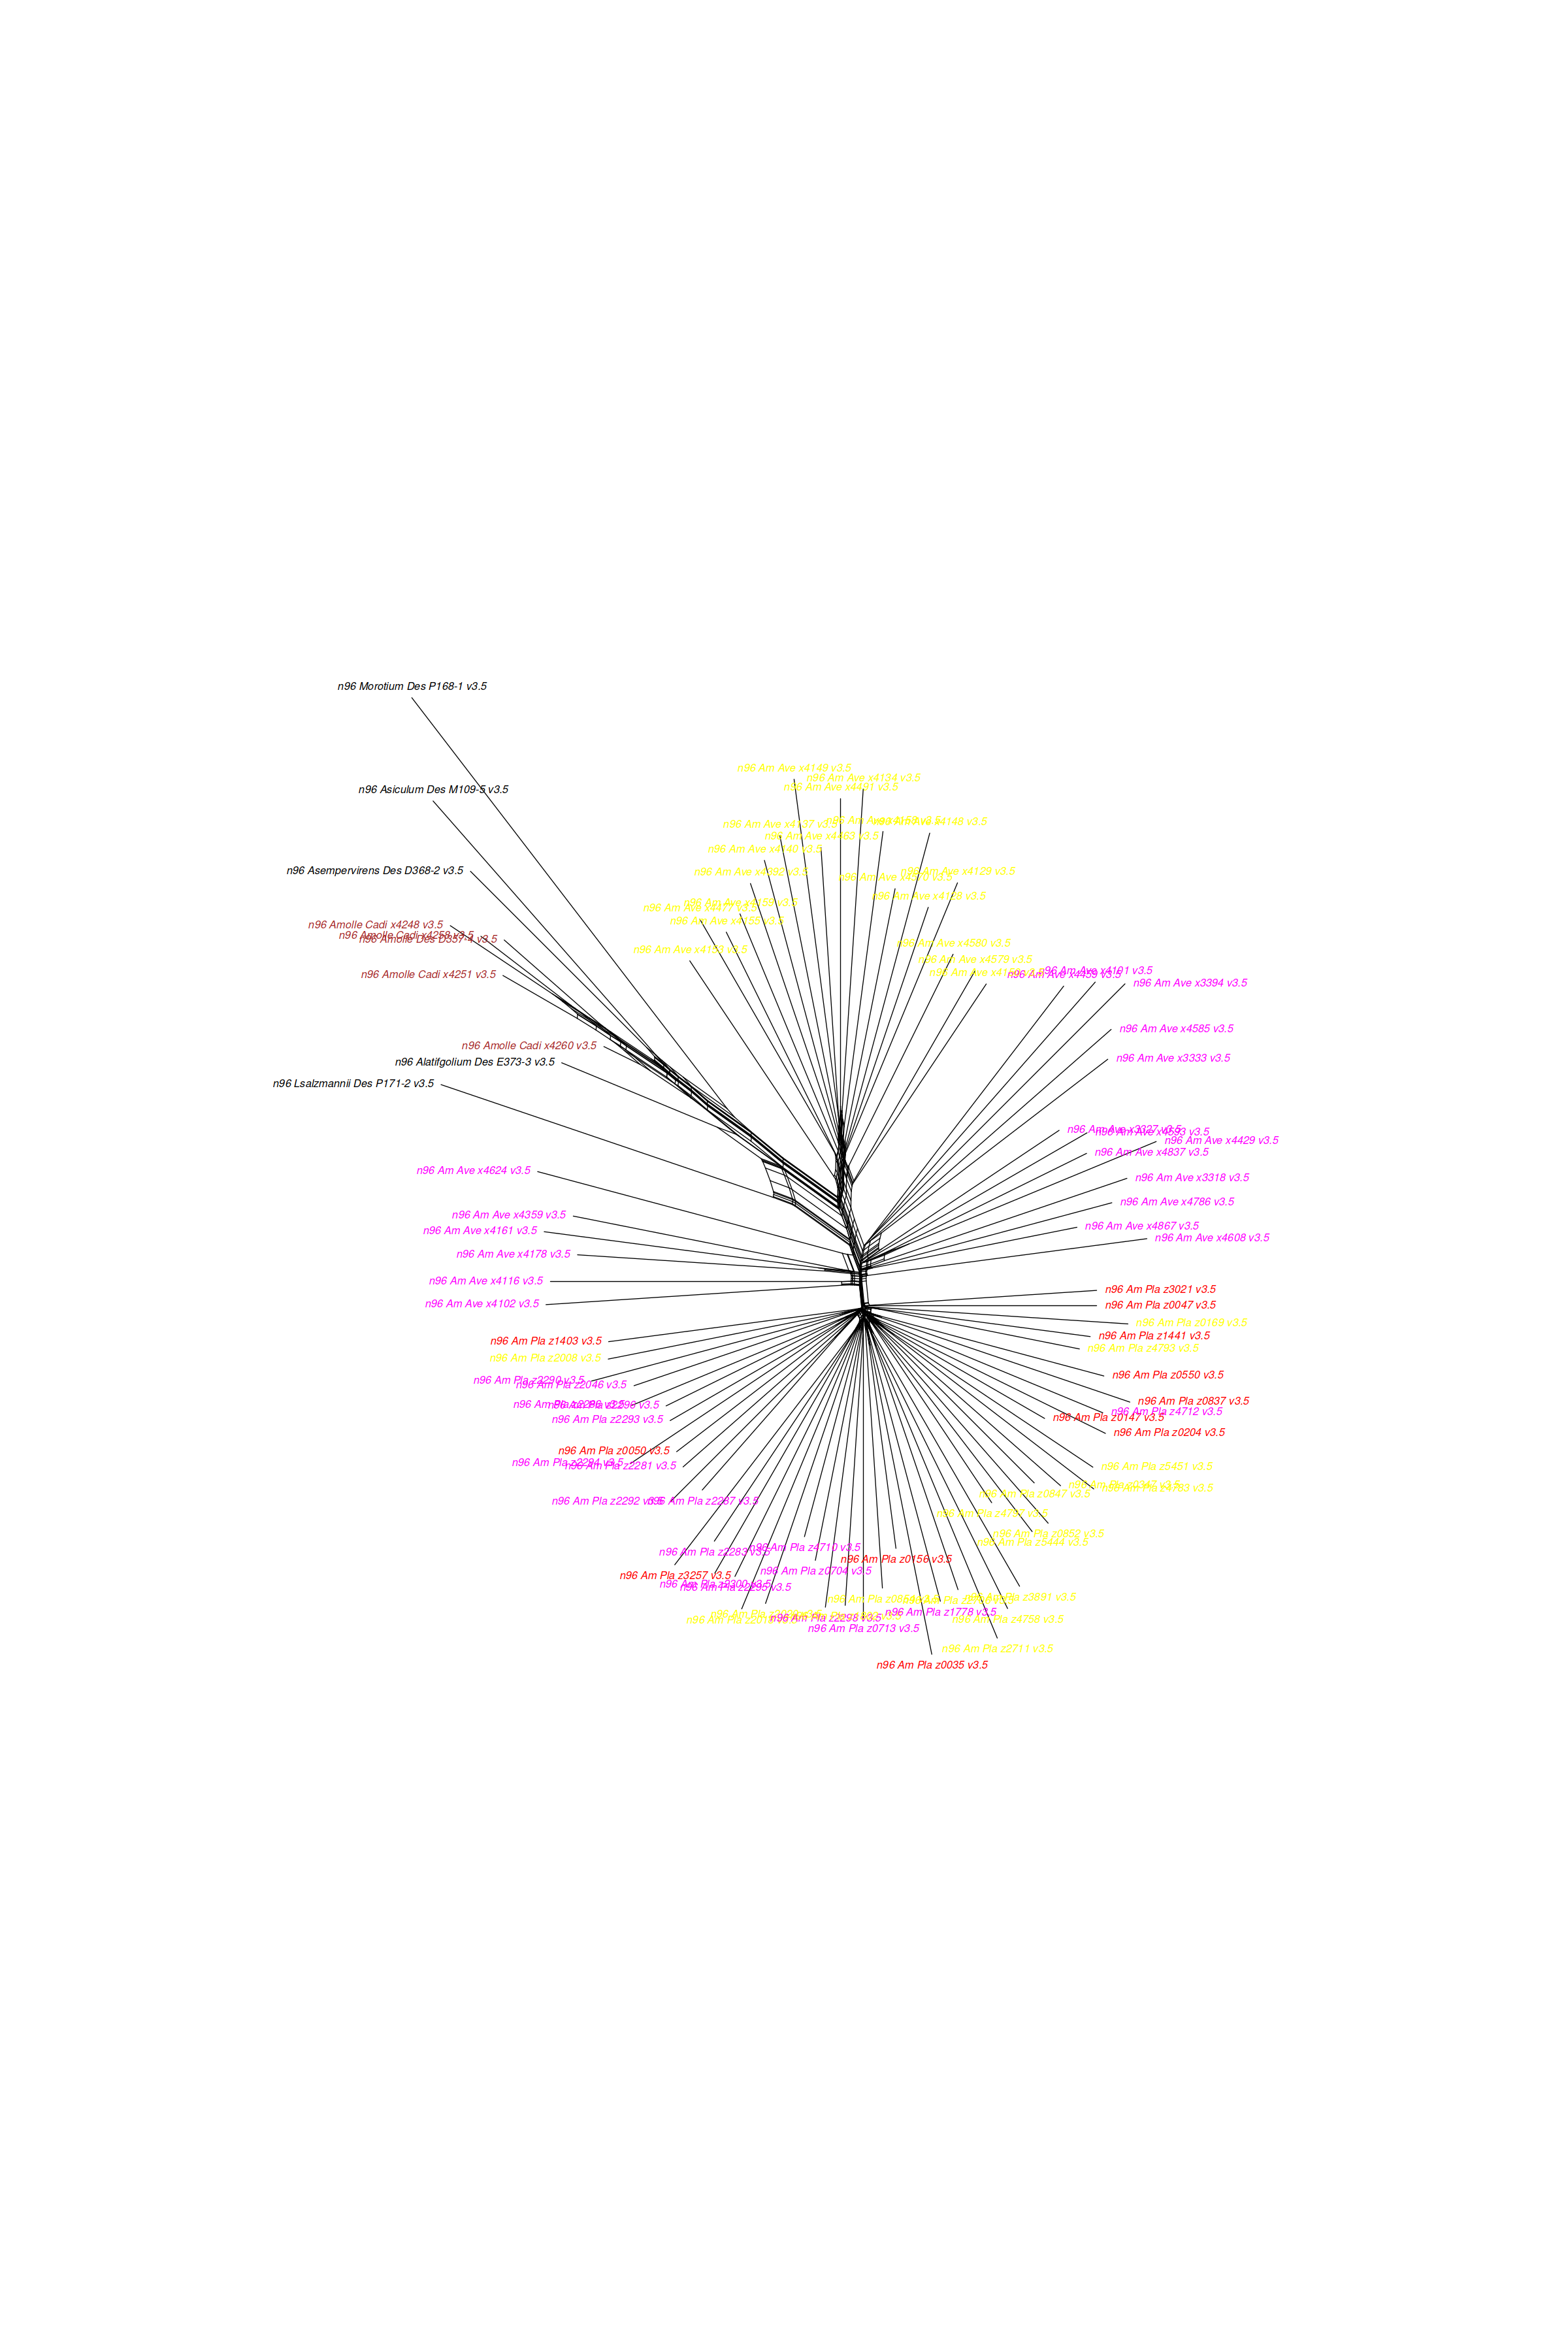

In [26]:
options(repr.plot.width=20, repr.plot.height=30)
nNet_n96.tip.colour <- samples[match(nNet_n96$tip.label, samples$ID),]$colour
par(mar = c(0,0,0,0))
plot(nNet_n96, cex = 0.8, edge.width = 0.8, use.edge.length = T, tip.color = nNet_n96.tip.colour, no.margin = TRUE)

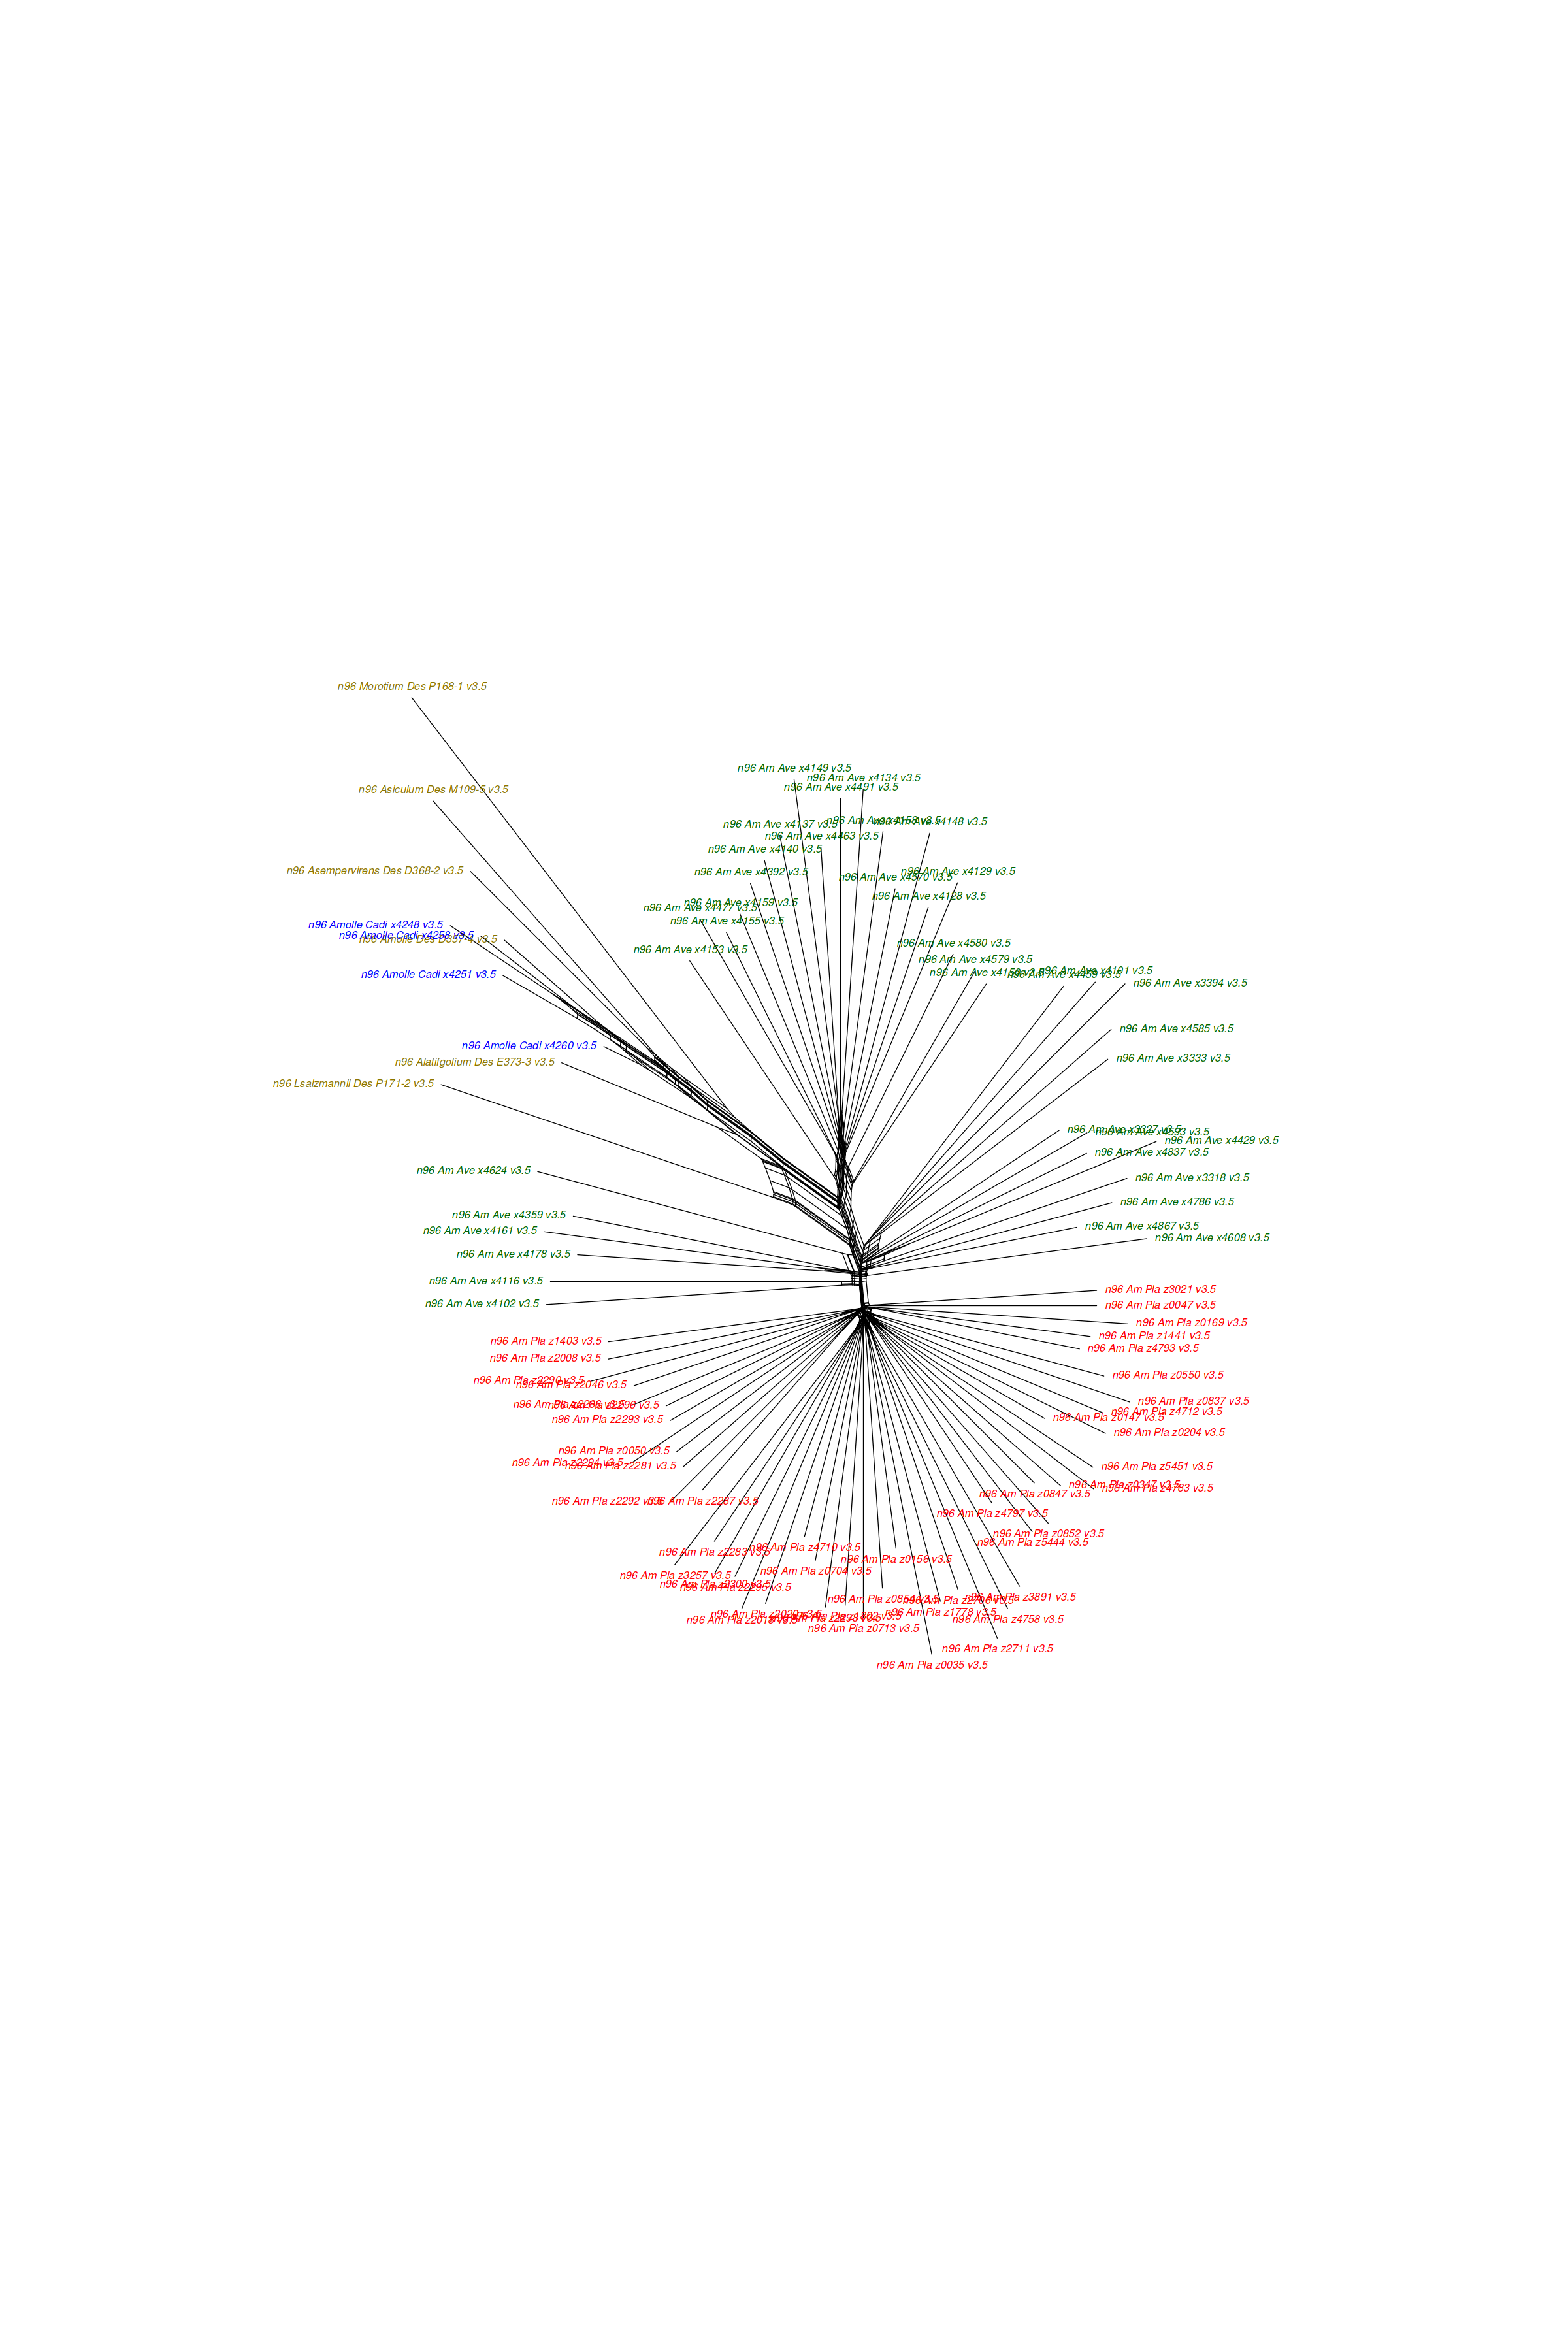

In [28]:
options(repr.plot.width=20, repr.plot.height=30)
nNet_n96.tip.colour <- samples[match(nNet_n96$tip.label, samples$ID),]$geography
par(mar = c(0,0,0,0))
plot(nNet_n96, cex = 0.8, edge.width = 0.8, use.edge.length = T, tip.color = nNet_n96.tip.colour, no.margin = TRUE)

In [29]:
## Add branch support values from the NJ tree onto neighbourNet network
nNet_n96_conf <- addConfidences(nNet_n96, treeNJ_n96)

In [30]:
## Write neighbourNet network
write.nexus.networx(nNet_n96_conf, file = "nNet_n96.nex", taxa = TRUE, splits = TRUE, append = FALSE)

## Redo the trees with n96 stitch

In [ ]:
## Read PHYLIP file
tic()
n96_stitch <- read.phyDat("~/snap_hap/variants/vcf_bcftools_n96/n96_stitch.min4.phy", format = "phylip", type = "dna")
toc()
str(n96_stitch)

In [ ]:
## Construct distance matrix
dm_n96_stitch <- dist.ml(n96_stitch, model = "JC69")

## Neighbour-Joining tree with bootstrapping
tic()
treeNJ_n96_stitch <- NJ(dm_n96_stitch)
bootstrapNJ_n96_stitch <- bootstrap.phyDat(n96_stitch, 
                                 FUN = function(x){NJ(dm_n96_stitch)}, 
                                 bs = 100)
toc()
treeNJ_n96_stitch <- plotBS(treeNJ_n96_stitch, bootstrapNJ_n96_stitch, "phylogram")

In [ ]:
## Neighbour Net
tic()
nNet_n96_stitch <- neighborNet(dm_n96_stitch)
toc()